<a href="https://colab.research.google.com/github/tarikacsg/gdsc/blob/main/gdsc3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
pip install sklearn.cross_validation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('car_price_prediction.csv')

data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [50]:
data.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923,4.0,Automatic,Front,04-May,Left wheel,White,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
#missing values signified by '-'

In [6]:
len(data[data.Levy=='-'])


5819

In [7]:
data.Levy = data.Levy.replace('-',0).astype('int64')
data.Mileage = data.Mileage.str.replace(r'([a-z])','').astype('int64')
data['Engine volume'] = data['Engine volume'].str.replace(r'([a-z,' ',A-Z])','').astype('f')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
cat_col = data.select_dtypes(include = ['object'])
cat_col.drop(columns = [ 'Manufacturer' , 'Model'] , inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
cars_dummies = pd.get_dummies(cat_col, drop_first = True)
cars_dummies.head()

,Prod. year_1943,Prod. year_1947,Prod. year_1953,Prod. year_1957,Prod. year_1964,Prod. year_1965,Prod. year_1968,Prod. year_1973,Prod. year_1974,Prod. year_1976,...,Airbags_7,Airbags_8,Airbags_9,Airbags_10,Airbags_11,Airbags_12,Airbags_13,Airbags_14,Airbags_15,Airbags_16
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:

cars_numeric = data.select_dtypes(include =['int64','float64'])

cars_numeric.head()

,Price,Levy,Mileage
0,13328,1399,186005
1,16621,1018,192000
2,8467,0,200000
3,3607,862,168966
4,11726,446,91901


In [80]:
car_df  = pd.concat([cars_numeric, cars_dummies], axis =1)

In [9]:
for i in cat_col:
    print(i,data[i].unique(),sep=':\n',end='\n\n')

Manufacturer:
['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']

Model:
['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']

Category:
['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']

Leather interior:
['Yes' 'No']

Fuel type:
['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']

Gear box type:
['Automatic' 'Tiptronic' 'Variat

In [11]:
data['Cylinders'] = data['Cylinders'].astype('O')
data['Airbags'] = data['Airbags'].astype('O')
data['Prod. year'] = data['Prod. year'].astype('O')

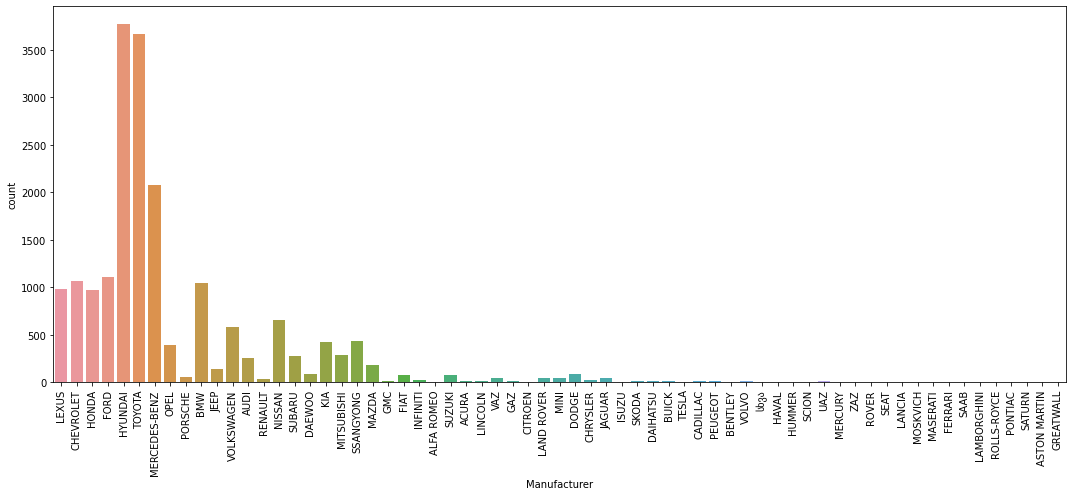

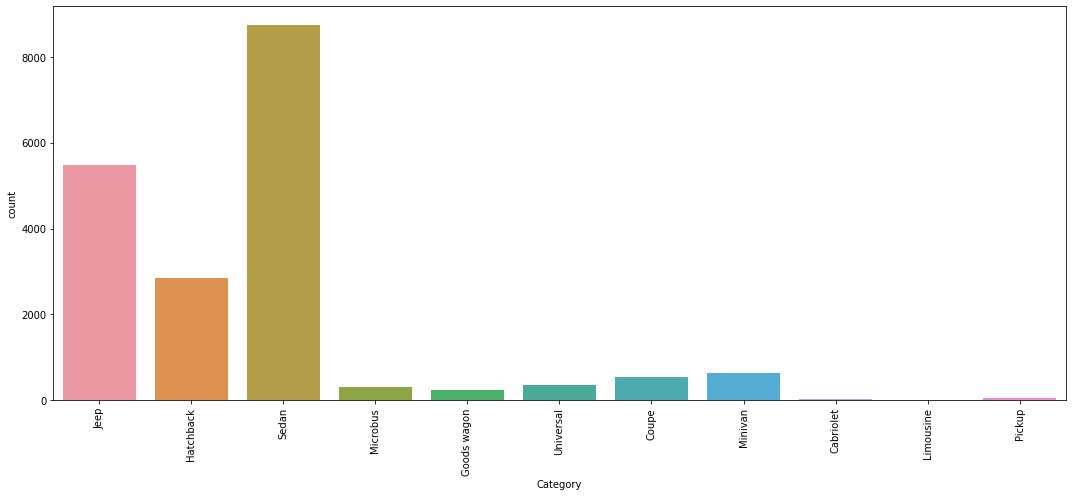

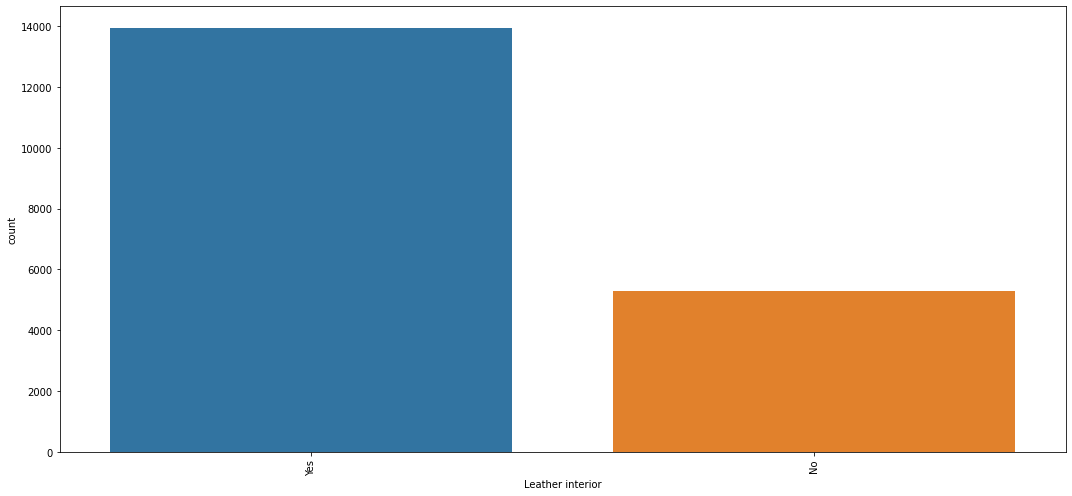

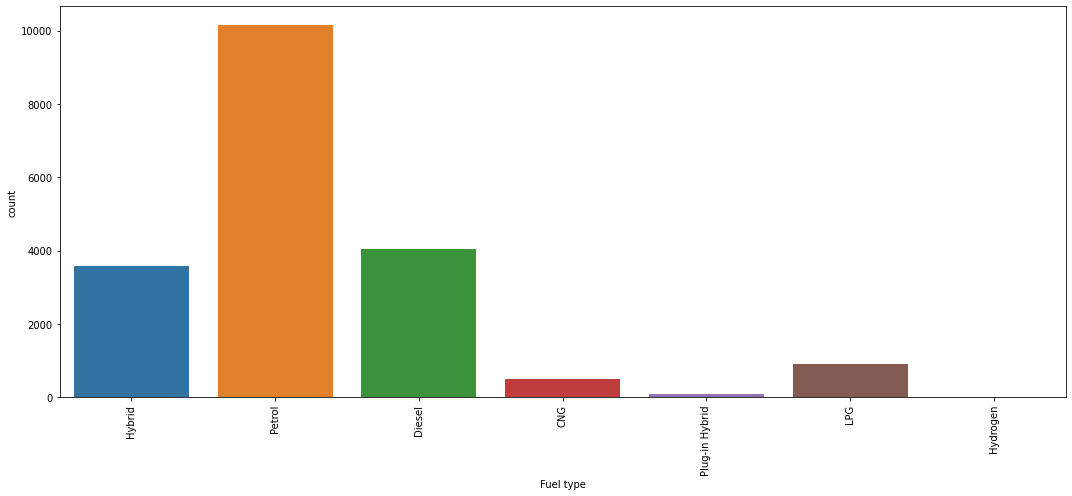

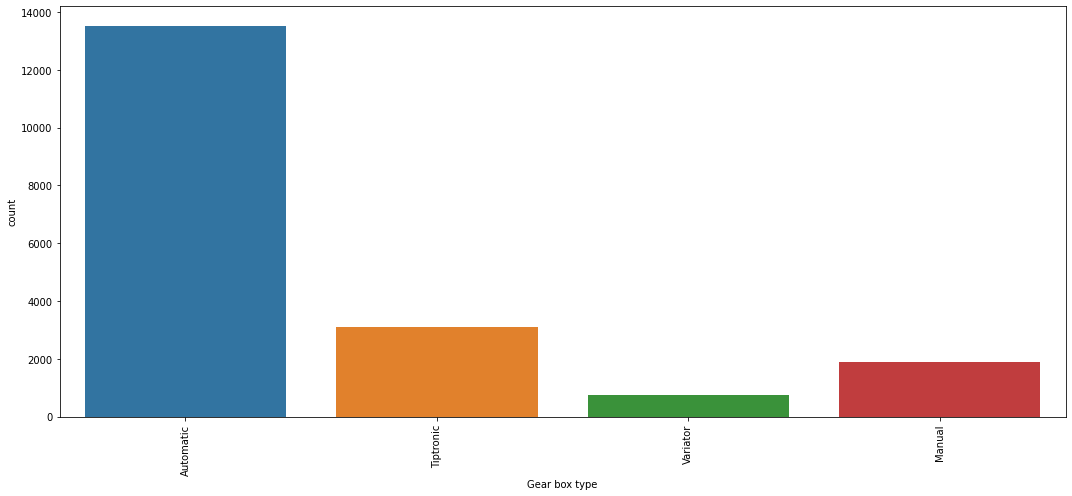

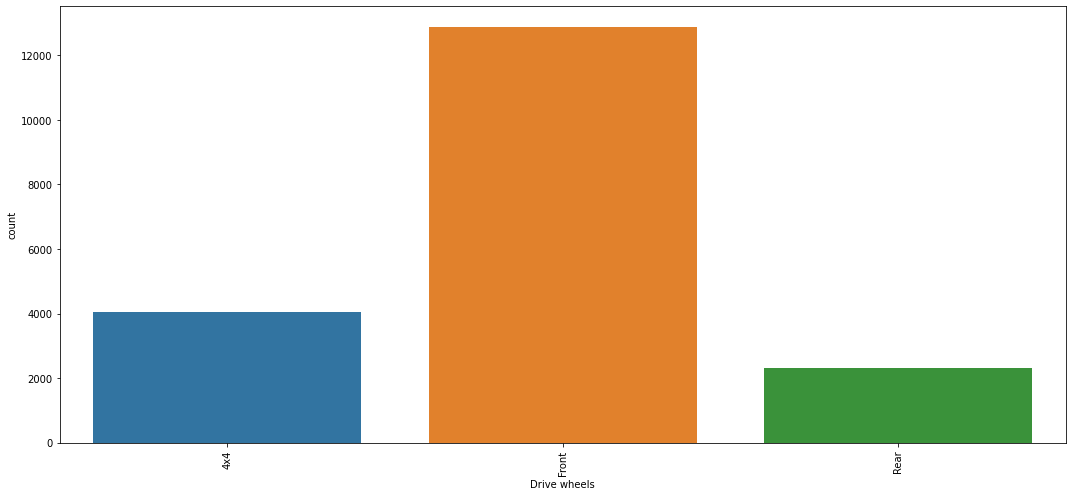

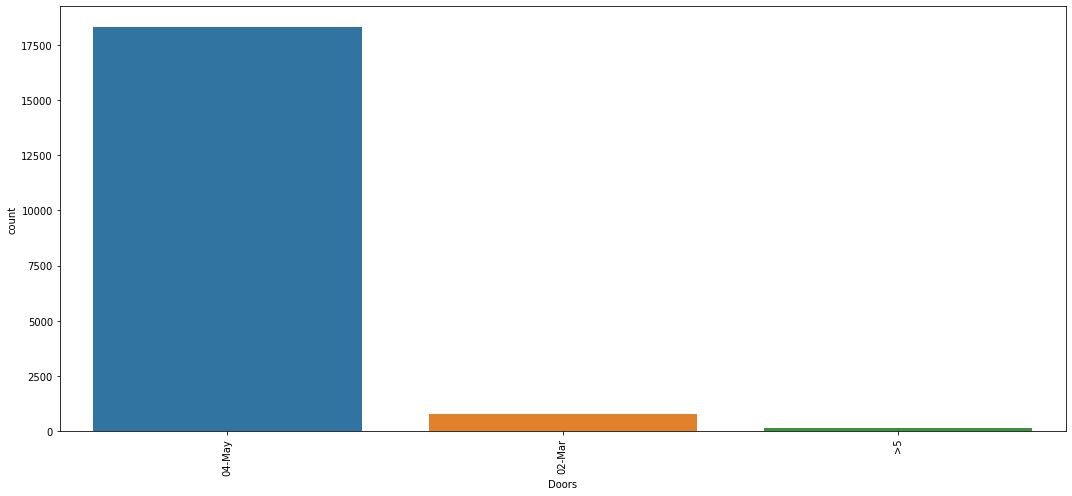

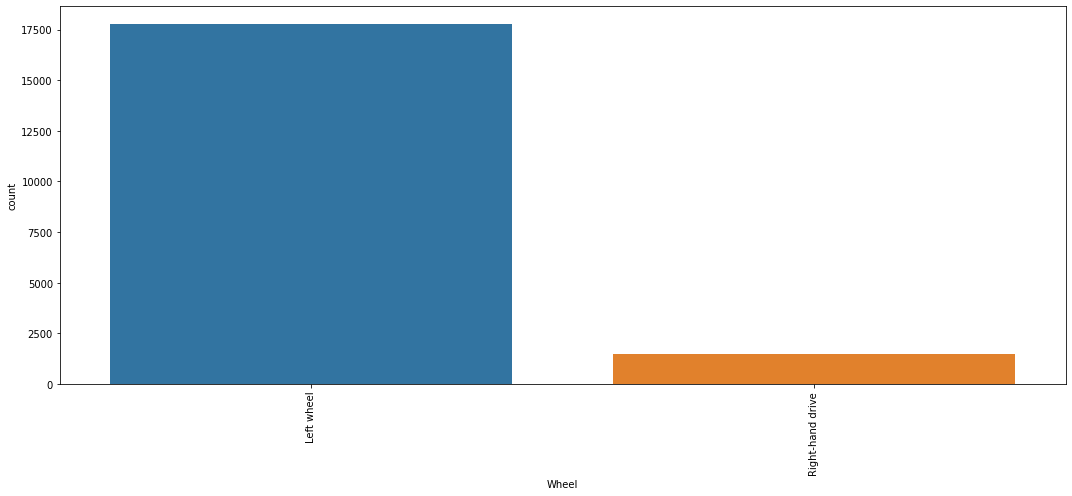

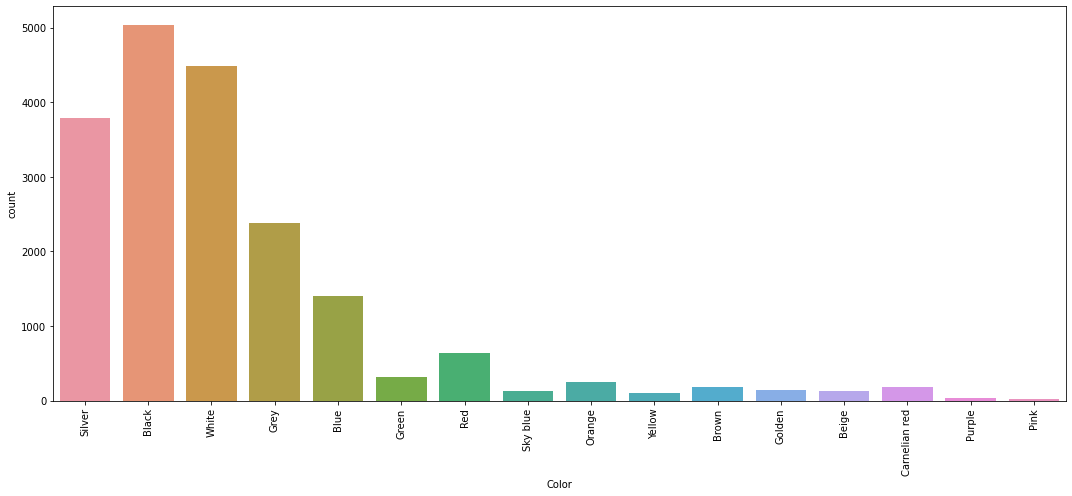

In [21]:
for i in cat_col:
  if i!='Model':
    plt.figure(figsize=[15,7])
    sns.countplot(x=data[i])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


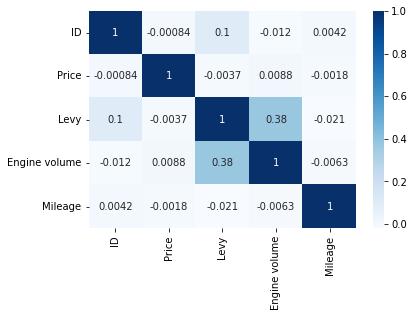

In [22]:
sns.heatmap(data=data.corr(),cmap='Blues',annot=True)
plt.show()

In [86]:
#train test split
X=car_df.copy()
X.drop(columns='Price',inplace=True)
y=car_df.copy()['Price']


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [92]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression())

In [93]:
y_per = rfe.predict(X_train)

In [94]:
from sklearn.metrics import mean_absolute_percentage_error
print('mean_absolute_percentage_error on train data',mean_absolute_percentage_error(y_train, y_per))

mean_absolute_percentage_error on train data 34.1992848440523


In [95]:
y_per = rfe.predict(X_test)

In [96]:
print('mean_absolute_percentage_error on train data',mean_absolute_percentage_error(y_test, y_per))

mean_absolute_percentage_error on train data 16.46750601504607
